# <center>236501 - Introduction to Artificial Intelligence<br>HW3 Report</center>



| שם      |    email     |       Id |
|:-------:|:--------------:|:------:|
|אופיר שחטמן|  ofir.s@campus.technion.ac.il   |     206180374      | 

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
#setup datasets
import utils
import numpy as np
X_train, y_train = utils.load_train()
X_test, y_test = utils.load_test()
from IPython.display import Markdown, display
printmd = lambda string: display(Markdown(string))
dict2str = lambda d: ', '.join([k+'='+str(v) for k,v in d.items()])

## 1. ID3

In [3]:
import ID3
ID3.main()

0.9469026548672567


## 3. Pruning

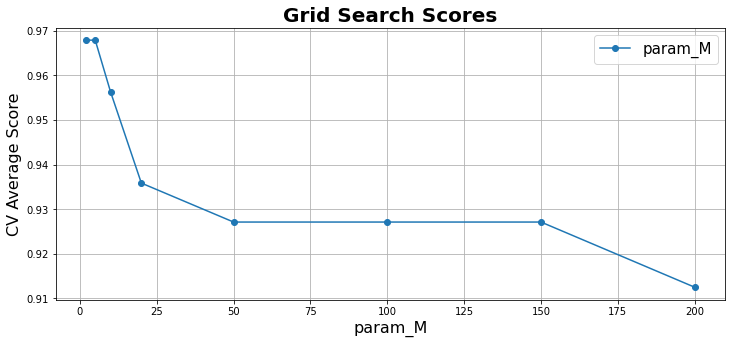

**best M** = 2

**test score** = 0.9469026548672567

In [4]:
# setup paramerets to cross-validation experiment
id3 = ID3.ID3()
parameters = {'M': [2, 5, 10, 20, 50, 100, 150, 200]}

# apply experiment
best_id3, best_M, best_score = utils.experiment(id3, X_train, y_train, parameters, plot=True)

# train all the train-set and get test-set score
printmd(f'**best M** = {best_M}')
test_score = best_id3.score(X_test, y_test)
printmd(f'**test score** = {test_score}')

## 4. KNN

In [5]:
import KNN
KNN.main()

0.9646017699115044


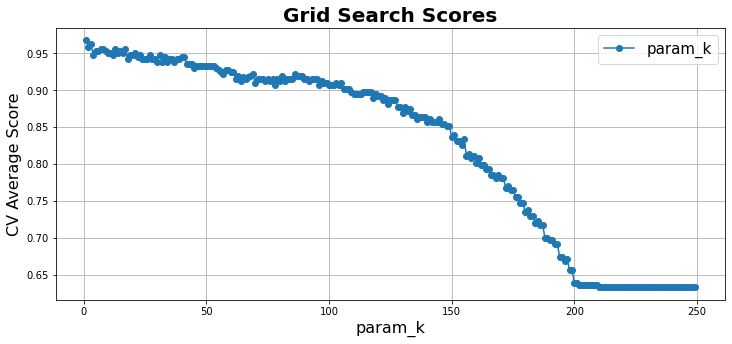

**best k** = 1

**test score** = 0.9646017699115044

In [9]:
# setup paramerets to cross-validation experiment
knn = KNN.KNNClassifier()
parameters = {'k': np.arange(1, 250)}

# apply experiment
best_knn, best_k, best_score = utils.experiment(knn, X_train, y_train, parameters, plot=True)

# train all the train-set and get test-set score
printmd(f'**best k** = {best_k}')
test_score = best_knn.score(X_test, y_test)
printmd(f'**test score** = {test_score}')

## 5. CostSensitiveKNN

In [10]:
import CostSensitiveKNN
CostSensitiveKNN.main()

0.01388888888888889


In [12]:
from CostSensitiveKNN import CostSensitiveKNN, sensitive_scorer, sensitive_loss
  
# apply experiment to the orginal knn
printmd('### Results without weighting:')
y_predicted = best_knn.predict(X_test)
printmd(f'**best loss** = {sensitive_loss(y_test, y_predicted)}\n')


printmd('### Results with weighting:')
# setup paramerets to cross-validation CostSensitiveKNN experiment
wknn = CostSensitiveKNN(k=None, w1=None, w2=None)
parameters = {'k': np.arange(1, 20), 'w1':np.arange(1, 20), 'w2':np.arange(0, 2, 0.1)}
# apply experiment
best_wknn, best_params, best_score = utils.experiment(wknn, X_train, y_train, parameters, scoring=sensitive_scorer, n_splits=5)


# train all the train-set and get test-set score
printmd(f'**best params:** {dict2str(best_params)}')
y_predicted = best_wknn.predict(X_test)
printmd(f'**best loss** = {sensitive_loss(y_test, y_predicted)}')

### Results without weighting:

**best loss** = 0.07455962059620595


### Results with weighting:

**best params:** k=5, w1=5, w2=0.9

**best loss** = 0.01388888888888889

## 6. KNN vs ID3

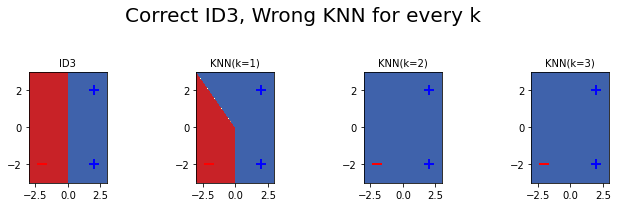

In [13]:
from KNN_vs_ID3 import KNN_vs_ID3
KNN_vs_ID3.plot_example1()

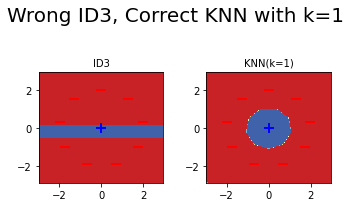

In [14]:
KNN_vs_ID3.plot_example2()

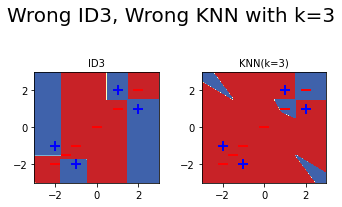

In [15]:
KNN_vs_ID3.plot_example3()

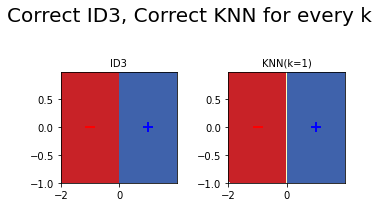

In [16]:
KNN_vs_ID3.plot_example4()

## 7. KNNForest

In [17]:
import KNNForest
KNNForest.main()

0.9823008849557522


In [18]:
# load expirement result
import pickle
with open('knn_forest_results.pickle', 'rb') as file:
    knn_forest_results = pickle.load(file)
for param_name, values in knn_forest_results.get('parameters').items():
    print(f'{param_name}={values}')
n_splits = knn_forest_results.get('n_splits')
print(f'n_splits={n_splits}')

param_M=[2 10 30]
param_N=[20 30 40 50 60 70 80 90 100 110 120 130 140]
param_k=[20 30 40 50 60 70 80 90 100 110 120 130 140]
param_p=[0.3 0.35 0.4 0.45 0.5 0.55 0.6 0.65 0.7]
n_splits=5


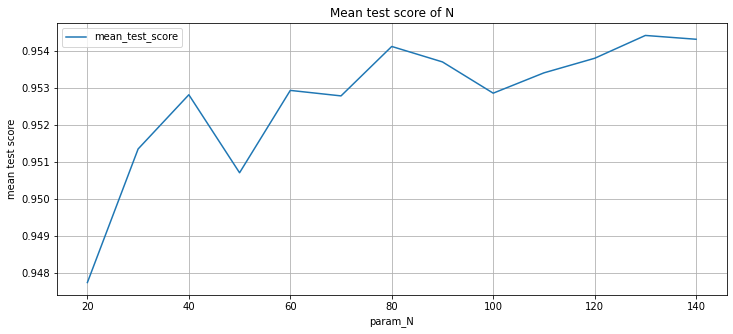

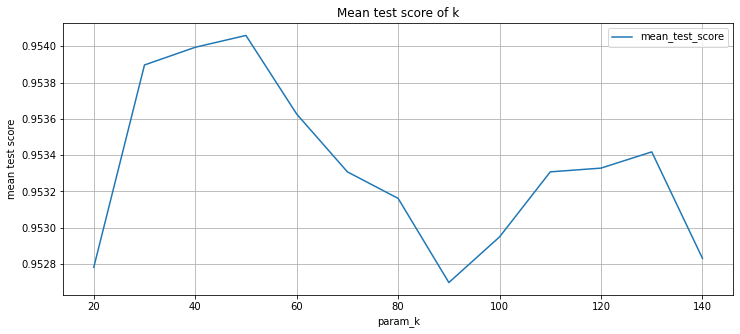

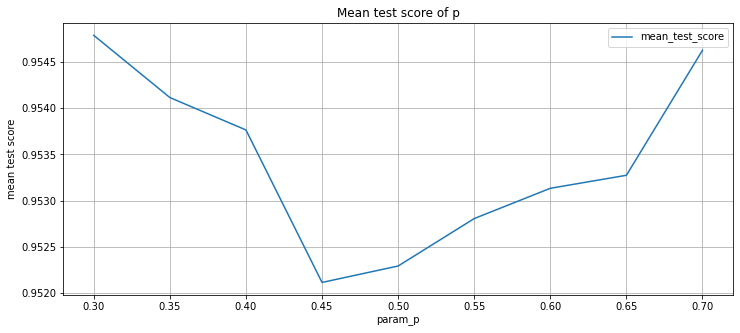

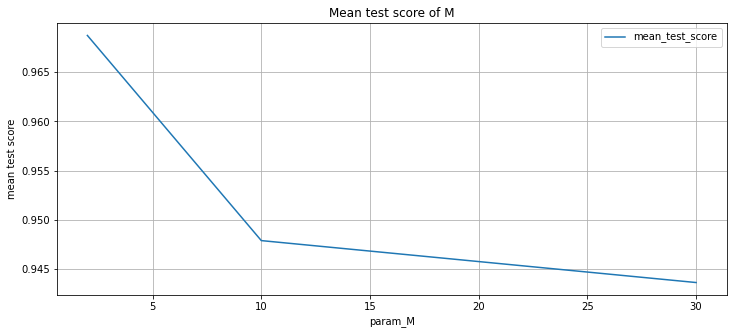

In [19]:
for p in ['N', 'k', 'p', 'M']:
    utils.plot_grid_search(knn_forest_results, 'mean', p, grid=True)

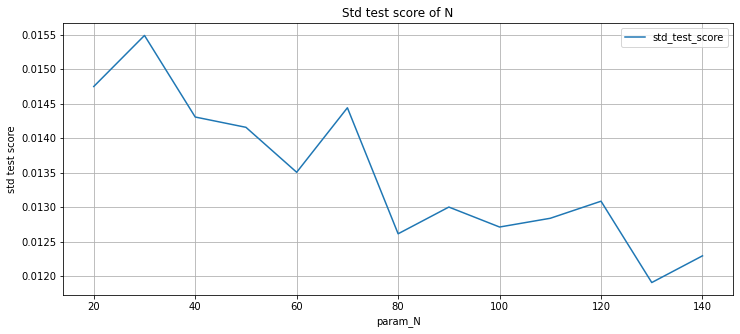

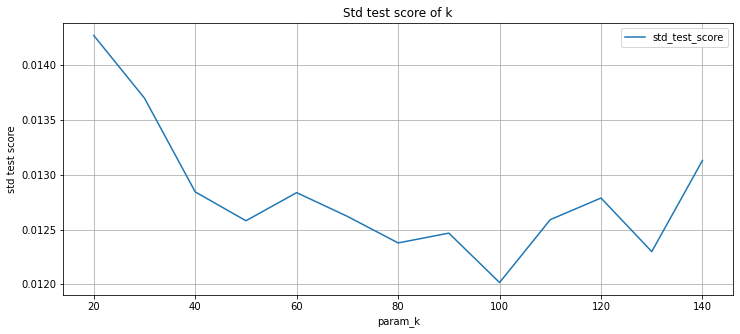

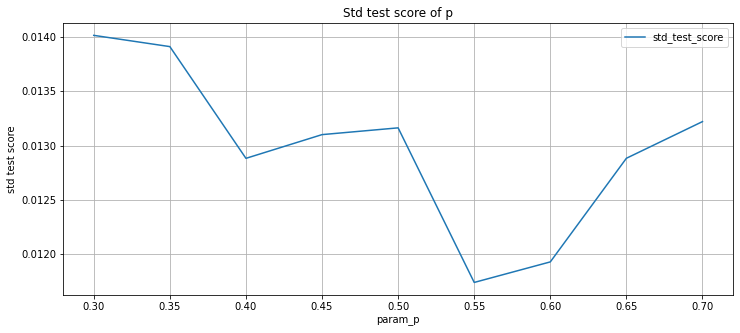

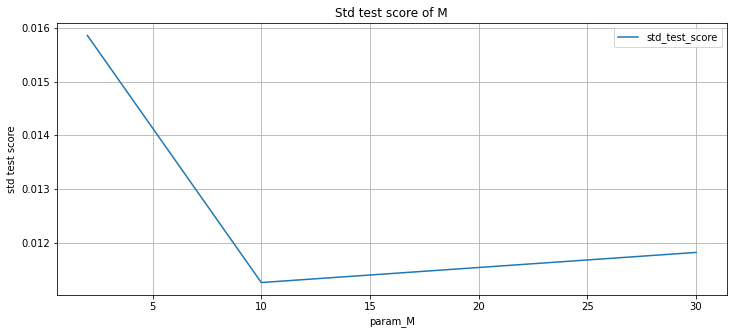

In [20]:
for p in ['N', 'k', 'p', 'M']:
    utils.plot_grid_search(knn_forest_results, 'std', p, grid=True)

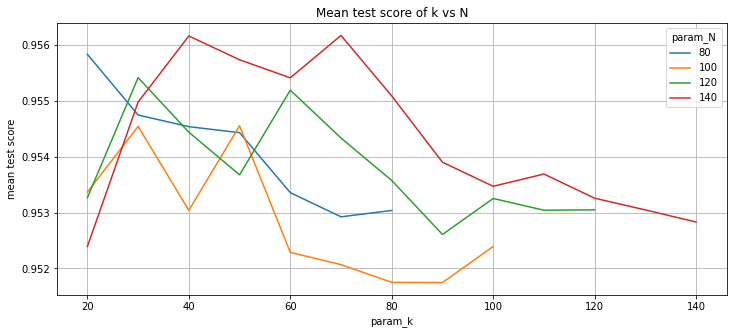

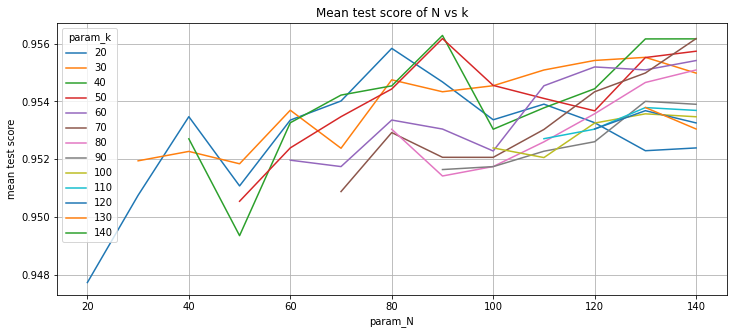

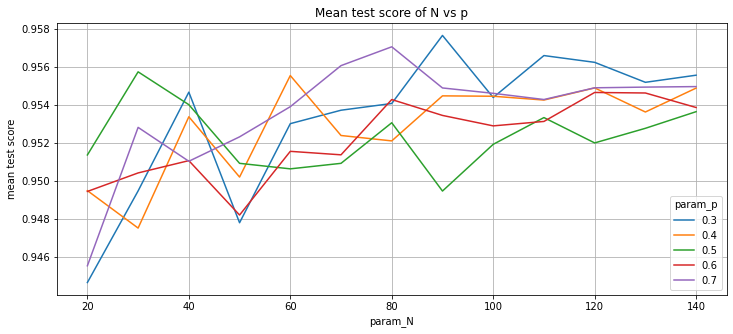

In [21]:
utils.plot_grid_search(knn_forest_results, 'mean', 'k', 'N', grid=True, y=[80, 100, 120, 140])
utils.plot_grid_search(knn_forest_results, 'mean', 'N', 'k', grid=True)
utils.plot_grid_search(knn_forest_results, 'mean', 'N', 'p', grid=True, y=[0.3, 0.4, 0.5, 0.6, 0.7])

In [22]:
def get_best(result):
    mean_test_score = result['mean_test_score']
    std_test_score = result['std_test_score']
    params = result['params']
    
    max_mean = np.max(mean_test_score)

    best_mean_id = np.argwhere(mean_test_score == max_mean).flatten()
    std_left = np.take(std_test_score,best_mean_id)
    
    min_std=np.min(std_left)
    best_std_id = np.argwhere(std_left == min_std).flatten()

    best = np.take(params,best_mean_id[best_std_id[0]])
    return best, max_mean, min_std

best_param, max_score, min_std = get_best(knn_forest_results)
printmd(f'**best params:** {dict2str(best_param)}')
printmd(f'**cross validation score:** {max_score}')
N, k, M, p = best_param['N'], best_param['k'], best_param['M'], best_param['p']

knn_forest = KNNForest.KNNForest(N, k, M=M, p=p)
knn_forest.fit(X_train, y_train)
test_score = knn_forest.score(X_test, y_test)
printmd(f'**test score** = {test_score}')

**best params:** M=2, N=50, k=20, p=0.35

**cross validation score:** 0.98537936913896

**test score** = 0.9823008849557522

## 8. improvedKNNForest

In [23]:
import improvedKNNForest
improvedKNNForest.main()

0.9911504424778761


In [24]:
# load expirement result
with open('imp_knn_forest_results.pickle', 'rb') as handle:
    imp_knn_forest_results = pickle.load(handle)
for param_name, values in imp_knn_forest_results.get('parameters').items():
    print(f'{param_name}={values}')
n_splits = imp_knn_forest_results.get('n_splits')
print(f'n_splits={n_splits}')

param_M=[2 5 10 30]
param_N=[20 30 40 50 60 70 80 90 100 110 120 130 140]
param_k=[20 30 40 50 60 70 80 90 100 110 120 130 140]
param_p=[0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
n_splits=5


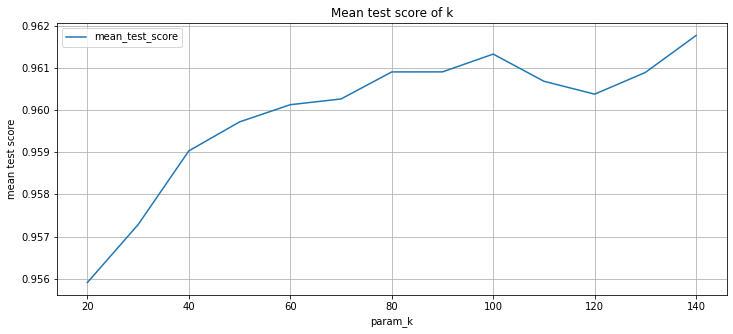

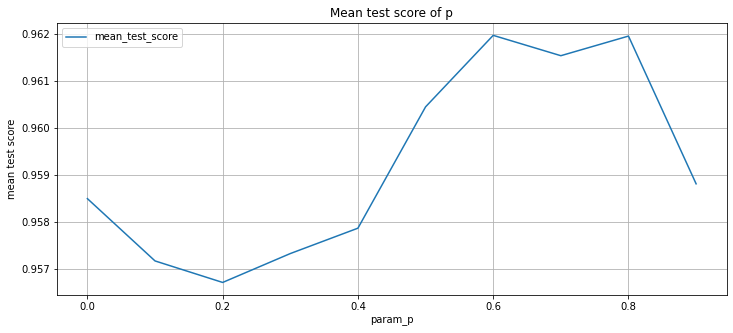

In [25]:
for p in ['k', 'p']:
    utils.plot_grid_search(imp_knn_forest_results, 'mean', p, grid=True)

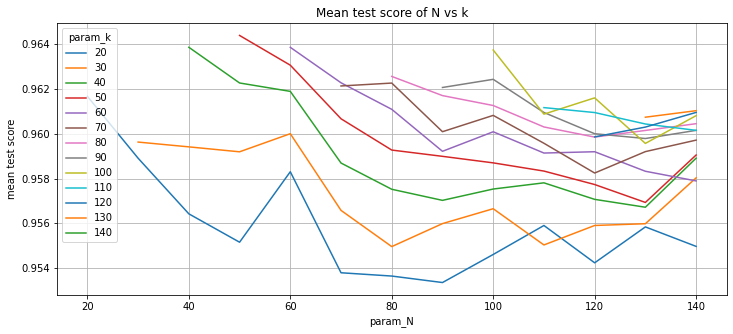

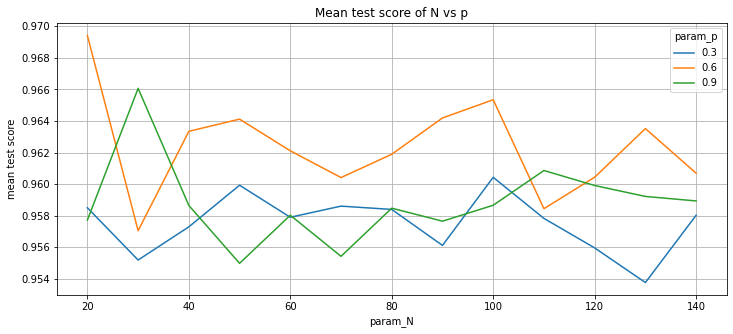

In [26]:
utils.plot_grid_search(imp_knn_forest_results, 'mean', 'N', 'k', grid=True)
utils.plot_grid_search(imp_knn_forest_results, 'mean', 'N', 'p', grid=True, y=[0.3, 0.6, 0.9])

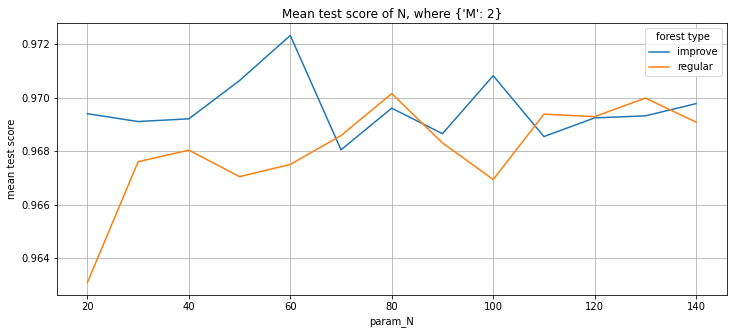

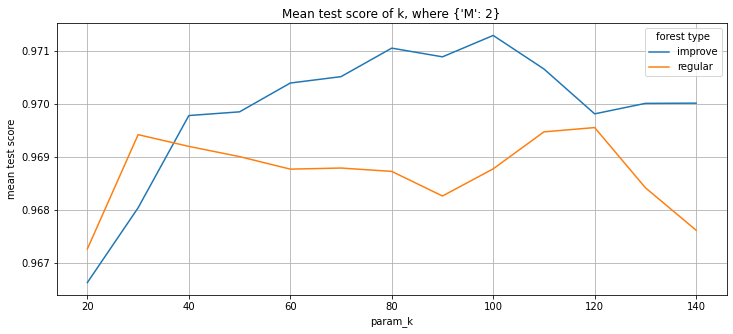

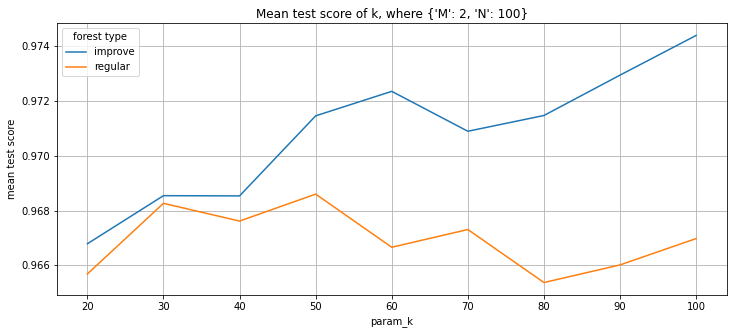

In [27]:
for p in ['N', 'k']:
    utils.plot_grid_search_compare(knn_forest_results, imp_knn_forest_results, 'mean', p, grid=True, where={'M':2})
utils.plot_grid_search_compare(knn_forest_results, imp_knn_forest_results, 'mean', 'k', grid=True, where={'M':2, 'N':100})

In [28]:
best_param, max_score, min_std = get_best(imp_knn_forest_results)
printmd(f'**best params:** {dict2str(best_param)}')
printmd(f'**cross validation score:** {max_score}')
N, k, M, p = best_param['N'], best_param['k'], best_param['M'], best_param['p']

imp_knn_forest = improvedKNNForest.improvedKNNForest(N, k, M=M, p=p)
imp_knn_forest.fit(X_train, y_train)
test_score = imp_knn_forest.score(X_test, y_test)
printmd(f'**test score** = {test_score}')

**best params:** M=2, N=100, k=100, p=0.6

**cross validation score:** 0.9883631713554987

**test score** = 0.9911504424778761